In [6]:
import os
import pylab
import pyaudio
import numpy as np
import wave
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy import signal
from pydub import AudioSegment
import scipy.fftpack

In [7]:
p = pyaudio.PyAudio()

def wave(volume, fs, duration, f):
    samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
    return samples 

# volume, sampling rate, duration, sine freq
e = wave(1, 44000, 0.4, 659.3)
b = wave(1, 44000, 0.3, 493.9)
c = wave(1, 44000, 0.25, 523.3)
d = wave(1, 44000, 0.25, 587.3)
a = wave(1, 44000, 0.15, 440)
f = wave(1, 44000, 0.25, 698.5)
g = wave(1, 44000, 0.25, 784)
a1 = wave(0.5, 44000, 0.15, 440)
e1 = wave(0.5, 44000, 0.4, 659.3)
c1 = wave(0.5, 44000, 0.25, 523.3)
d1 = wave(0.5, 44000, 0.25, 587.3)

c = np.concatenate((e, b, c, d, c, b, a, a, c, e, d, c, b, c, d, e, c, a, a, d, f, a, g, f, e, c, e, d, c, b, b, c1, d1, e1, c1, a1, a1))
c = np.concatenate((c, c))


fs = 44100
volume = 1
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)
stream.write(volume*c)
stream.stop_stream()
stream.close()
p.terminate()

In [25]:
scipy.io.wavfile.write('test.wav', 40100, c)

In [27]:
from pydub import AudioSegment

signal = AudioSegment.from_wav("test.wav")

bbb = AudioSegment.from_wav("mix.wav")

res = signal.overlay(bbb)

ready = res.fade_in(3000).fade_out(3000)

ready.export("ready1.wav", format="wav")

<_io.BufferedRandom name='ready1.wav'>

Text(0,0.5,'Amplitude')

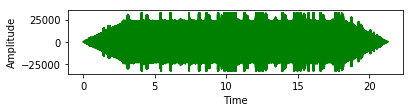

In [31]:
%matplotlib inline
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
from matplotlib import pyplot as plt

fs_rate, signal = wavfile.read("ready1.wav")
t = scipy.arange(0, secs, Ts)
FFT = abs(scipy.fft(signal))
FFT_side = FFT[range(N//2)]
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(N//2)]
fft_freqs_side = np.array(freqs_side)
plt.subplot(311)
p1 = plt.plot(t, signal, "g")
plt.xlabel('Time')
plt.ylabel('Amplitude')

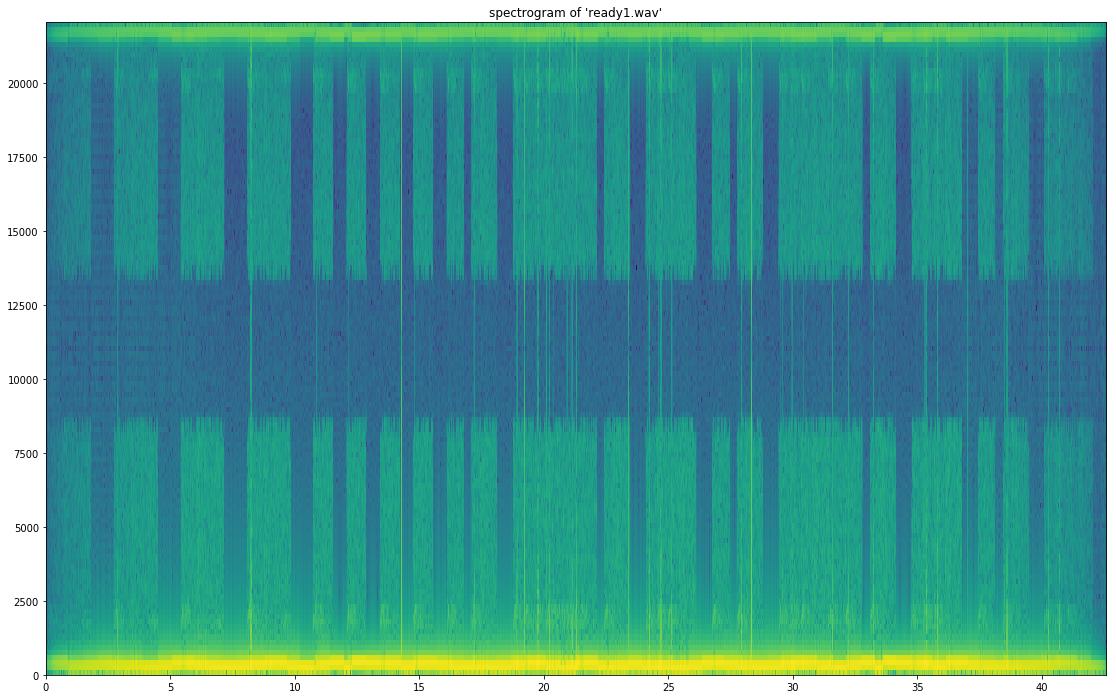

In [29]:

def graph_spectrogram(wav_file):
    sound_info, frame_rate = get_wav_info(wav_file)
    pylab.figure(num=None, figsize=(19, 12))
    pylab.subplot(111)
    pylab.title('spectrogram of %r' % wav_file)
    pylab.specgram(sound_info, Fs=frame_rate)
    pylab.savefig('spect.png')

def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.fromstring(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

graph_spectrogram('ready1.wav')